In [1]:
import yfinance as yf

# Download Tesla stock data
data = yf.download("TSLA", start="2020-01-01", end="2025-11-25")

# Save to CSV
data.to_csv("tesla_stock.csv")

print("Saved as tesla_stock.csv")


/tmp/ipython-input-4223516608.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start="2020-01-01", end="2025-11-25")
[*********************100%***********************]  1 of 1 completed

Saved as tesla_stock.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/tesla_stock.csv')
df.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,28.68400001525879,28.713333129882812,28.11400032043457,28.299999237060547,142981500
3,2020-01-03,29.534000396728516,30.266666412353516,29.128000259399414,29.366666793823242,266677500
4,2020-01-06,30.1026668548584,30.104000091552734,29.333332061767578,29.364667892456055,151995000


In [3]:
import os

for root, dirs, files in os.walk('/content', topdown=True):
    for name in files:
        print(os.path.join(root, name))


/content/tesla_stock.csv
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_opt_in_prompt.yaml
/content/.config/logs/2025.11.20/14.30.36.623222.log
/content/.config/logs/2025.11.20/14.30.04.285207.log
/content/.config/logs/2025.11.20/14.30.35.382199.log
/content/.config/logs/2025.11.20/14.30.45.231815.log
/content/.config/logs/2025.11.20/14.30.27.010422.log
/content/.config/logs/2025.11.20/14.30.45.937471.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv


In [4]:
!ls /content


sample_data  tesla_stock.csv


In [5]:
!ls


sample_data  tesla_stock.csv


In [6]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [14]:
df = pd.read_csv("tesla_stock.csv", header=0)


In [15]:
df = df.iloc[2:]   # remove first 2 corrupted rows


In [16]:
df.reset_index(drop=True, inplace=True)


In [17]:
df.rename(columns={'Price': 'Date'}, inplace=True)


/tmp/ipython-input-3167592202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Price': 'Date'}, inplace=True)


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


/tmp/ipython-input-1756150960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
print(df.head())
print(df.columns)

                         Close                High                 Low  \
Date                                                                     
2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   
2020-01-07  31.270666122436523  31.441999435424805  30.224000930786133   
2020-01-08   32.80933380126953     33.232666015625  31.215333938598633   

                          Open     Volume  
Date                                       
2020-01-02  28.299999237060547  142981500  
2020-01-03  29.366666793823242  266677500  
2020-01-06  29.364667892456055  151995000  
2020-01-07  30.760000228881836  268231500  
2020-01-08  31.579999923706055  467164500  
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [20]:
# ---------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ---------------------------------------------
# 2. SELECT TARGET FEATURE (Adj Close or Close)
# ---------------------------------------------
# If dataset has "Adj Close", use this:
# data = df[['Adj Close']].values

# Your cleaned dataset shows "Close"
data = df[['Close']].values

print("Data shape:", data.shape)

# ---------------------------------------------
# 3. SCALING
# ---------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

print("Scaled data shape:", scaled_data.shape)

# ---------------------------------------------
# 4. CREATE TIME-SERIES SEQUENCES
# ---------------------------------------------
def create_sequences(dataset, window_size):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i - window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

window_size = 60  # last 60 days input
X, y = create_sequences(scaled_data, window_size)

# Reshape for RNN/LSTM input: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

# ---------------------------------------------
# 5. TRAIN / TEST SPLIT (80/20)
# ---------------------------------------------
split = int(len(X) * 0.8)

X_train = X[:split]
X_test  = X[split:]

y_train = y[:split]
y_test  = y[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Data shape: (1483, 1)
Scaled data shape: (1483, 1)
X shape: (1423, 60, 1)
y shape: (1423,)
Train shape: (1138, 60, 1) (1138,)
Test shape: (285, 60, 1) (285,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.8718e-04 - val_loss: 0.0023
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0137e-04 - val_loss: 0.0022
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.5298e-04 - val_loss: 0.0019
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7049e-04 - val_loss: 0.0017
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.3748e-04 - val_loss: 0.0014
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0879e-04 - val_loss: 0.0016
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2062e-04 - val_loss: 0.0014
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.7729e-04 - val_loss: 0.0021
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.7398e-04 - val_loss: 0.0016
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7323e-04 - val_loss: 0.0016
Epoch 12/20
36/36 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0409 - val_loss: 0.0046
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.9170e-04 - val_loss: 0.0022
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2752e-04 - val_loss: 0.0020
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/ste

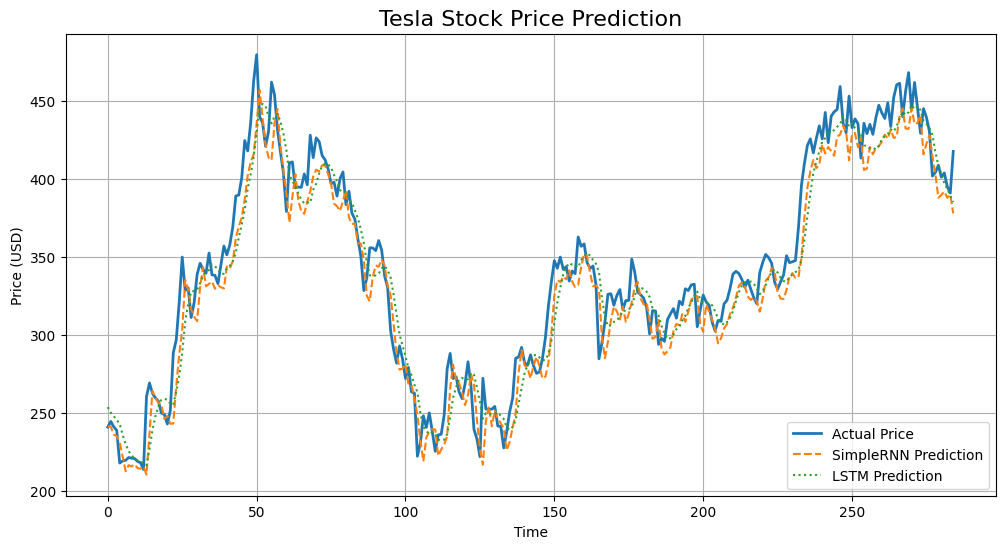

In [21]:
#RNN + LSTM — TRAINING, PREDICTION & PLOTTING
# ---------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ---------------------------------------------
# 2. SIMPLE RNN MODEL
# ---------------------------------------------
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, return_sequences=False, input_shape=(window_size, 1)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer=Adam(0.001), loss='mse')

print(model_rnn.summary())

# TRAIN SimpleRNN
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# ---------------------------------------------
# 3. LSTM MODEL
# ---------------------------------------------
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(window_size, 1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer=Adam(0.001), loss='mse')

print(model_lstm.summary())

# TRAIN LSTM
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# ---------------------------------------------
# 4. MAKING PREDICTIONS
# ---------------------------------------------
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)

# Inverse transform (back to real price)
pred_rnn = scaler.inverse_transform(pred_rnn)
pred_lstm = scaler.inverse_transform(pred_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------------------------------
# 5. PLOT RESULTS
# ---------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price", linewidth=2)
plt.plot(pred_rnn, label="SimpleRNN Prediction", linestyle='--')
plt.plot(pred_lstm, label="LSTM Prediction", linestyle=':')
plt.title("Tesla Stock Price Prediction", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
